In [26]:
from numpy import pi
import numpy as np
from numpy.linalg import solve, norm    # Solve linear systems and compute norms
import matplotlib.pyplot as plt

newparams = {'figure.figsize': (6.0, 6.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

In [23]:
def cardinal(xdata, x):
    """
    cardinal(xdata, x): 
    In: xdata, array with the nodes x_i.
        x, array or a scalar of values in which the cardinal functions are evaluated.
    Return: l: a list of arrays of the cardinal functions evaluated in x. 
    """
    n = len(xdata)              # Number of evaluation points x
    l = []
    for i in range(n):          # Loop over the cardinal functions
        li = np.ones(len(x))
        for j in range(n):      # Loop to make the product for l_i
            if i is not j:
                li = li*(x-xdata[j])/(xdata[i]-xdata[j])
        l.append(li)            # Append the array to the list            
    return l

def lagrange(ydata, l):
    """
    lagrange(ydata, l):
    In: ydata, array of the y-values of the interpolation points.
         l, a list of the cardinal functions, given by cardinal(xdata, x)
    Return: An array with the interpolation polynomial. 
    """
    poly = 0                        
    for i in range(len(ydata)):
        poly = poly + ydata[i]*l[i]  
    return poly

[4.47288829e+09]


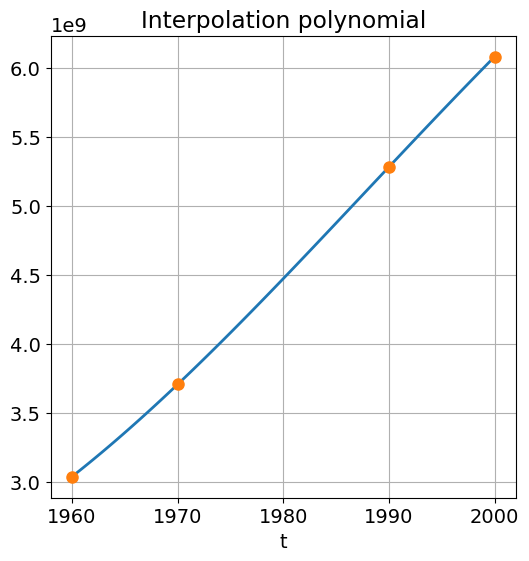

In [24]:
xdata = [1960, 1970, 1990, 2000]
ydata = [3_039_585_530,  3_707_475_887, 5_281_653_820, 6_079_603_571]

x = np.linspace(xdata[0], xdata[-1], 101)
l = cardinal(xdata, x)
p = lagrange(ydata, l)

plt.plot(x, p)
plt.plot(xdata, ydata, "o")
plt.xlabel("t")
plt.title("Interpolation polynomial")
print(p[np.where(x==1980)])



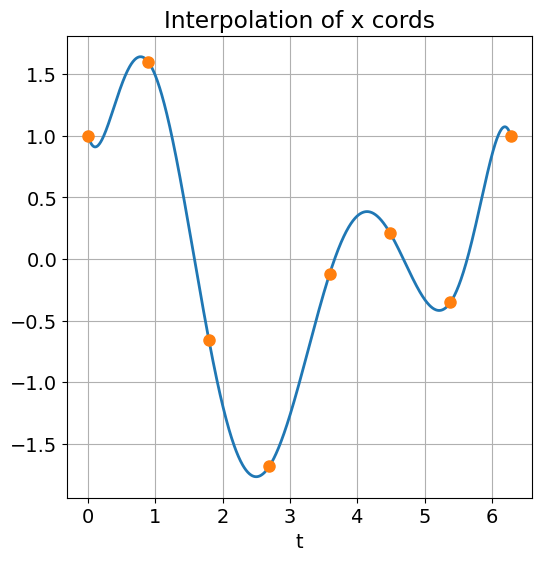

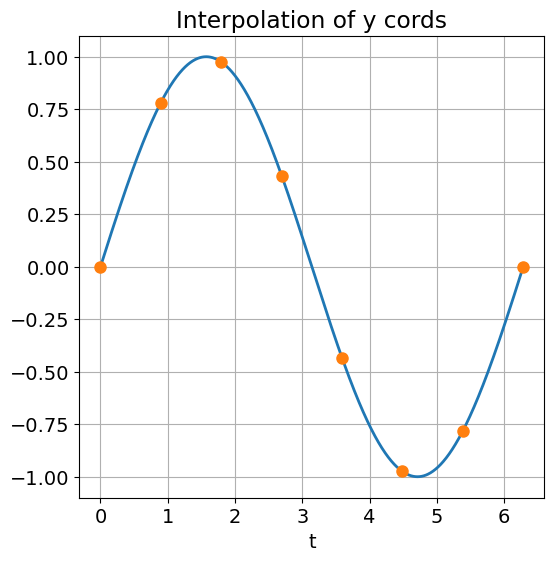

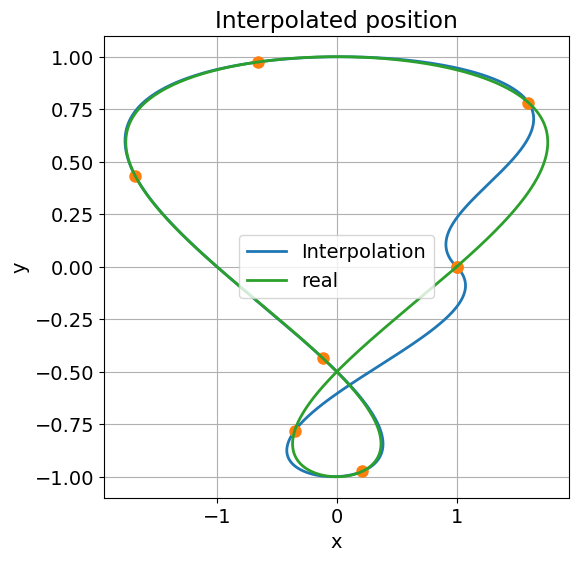

In [31]:
tdata = [0, 0.8976, 1.7952, 2.6928, 3.5904, 4.4880, 5.3856, 6.2832]
xdata = [1, 1.5984, -0.6564, -1.6828, -0.1191, 0.2114, -0.3514, 1]
ydata = [0, 0.7818, 0.9750, 0.4339, -0.4339 ,-0.975 ,-0.7818, 0]

ts = np.linspace(tdata[0], tdata[-1], 1000)
lx = cardinal(tdata, ts)
ly = cardinal(tdata, ts)
px = lagrange(xdata, lx)
py = lagrange(ydata, ly)

plt.plot(ts, px)
plt.plot(tdata, xdata, "o")
plt.xlabel("t")
plt.title("Interpolation of x cords")
plt.show()

plt.plot(ts, py)
plt.plot(tdata, ydata, "o")
plt.title("Interpolation of y cords")
plt.xlabel("t")
plt.show()

plt.plot(px, py, label="Interpolation")
plt.plot(xdata, ydata, "o")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolated position")

xf = lambda t: np.cos(t) +np.sin(2*t)
yf = lambda t: np.sin(t)

xs = [xf(t) for t in ts]
ys = [yf(t) for t in ts]

plt.plot(xs, ys, label="real")
plt.legend()
plt.show()

